# Introduction to Seaborn
> What is Seaborn, and when should you use it? In this chapter, you will find out! Plus, you will learn how to create scatter plots and count plots with both lists of data and pandas DataFrames. You will also be introduced to one of the big advantages of using Seaborn - the ability to easily add a third variable to your plots by using color to represent different subgroups. This is the Summary of lecture "Introduction to Data Visualization with Seaborn", via datacamp.

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Datacamp, Visualization]
- image: 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 5)

## Introduction to Seaborn
- What is seaborn
    - Python data visualization library
    - Easily create the most common types of plots
    

### Making a scatter plot with lists
In this exercise, we'll use a dataset that contains information about 227 countries. This dataset has lots of interesting information on each country, such as the country's birth rates, death rates, and its gross domestic product (GDP). GDP is the value of all the goods and services produced in a year, expressed as dollars per person.

We've created three lists of data from this dataset to get you started. `gdp` is a list that contains the value of GDP per country, expressed as dollars per person. `phones` is a list of the number of mobile phones per 1,000 people in that country. Finally, `percent_literate` is a list that contains the percent of each country's population that can read and write.

In [2]:
df = pd.read_csv('./dataset/countries-of-the-world.csv')
df.head()

Country                               Region  Population  \
0     Afghanistan         ASIA (EX. NEAR EAST)             31056997   
1         Albania   EASTERN EUROPE                          3581655   
2         Algeria   NORTHERN AFRICA                        32930091   
3  American Samoa   OCEANIA                                   57794   
4         Andorra   WESTERN EUROPE                            71201   

   Area (sq. mi.) Pop. Density (per sq. mi.) Coastline (coast/area ratio)  \
0          647500                       48,0                         0,00   
1           28748                      124,6                         1,26   
2         2381740                       13,8                         0,04   
3             199                      290,4                        58,29   
4             468                      152,1                         0,00   

  Net migration Infant mortality (per 1000 births)  GDP ($ per capita)  \
0         23,06                             163,07               700.0   
1         -4,93                              21,52              4500.0   
2         -0,39                                 31              6000.0   
3        -20,71                               9,27              8000.0   
4           6,6                               4,05             19000.0   

  Literacy (%) Phones (per 1000) Arable (%) Crops (%) Other (%) Climate  \
0         36,0               3,2      12,13      0,22     87,65       1   
1         86,5              71,2      21,09      4,42     74,49       3   
2         70,0              78,1       3,22      0,25     96,53       1   
3         97,0             259,5         10        15        75       2   
4        100,0             497,2       2,22         0     97,78       3   

  Birthrate Deathrate Agriculture Industry Service  
0      46,6     20,34        0,38     0,24    0,38  
1     15,11      5,22       0,232    0,188   0,579  
2     17,14      4,61       0,101      0,6   0,298  
3     22,46      3,27         NaN      NaN     NaN  
4      8,71      6,25         NaN      NaN     NaN

In [3]:
gdp = df['GDP ($ per capita)'].tolist()
phones = df['Phones (per 1000)'].tolist()
percent_literate = df['Literacy (%)'].tolist()
region = df['Region'].tolist()

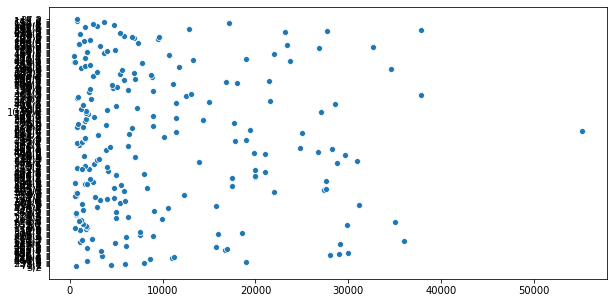

In [4]:
# Create scatter plot with GDP on the x-axis and number of phones on the y-axis
sns.scatterplot(x=gdp, y=phones);

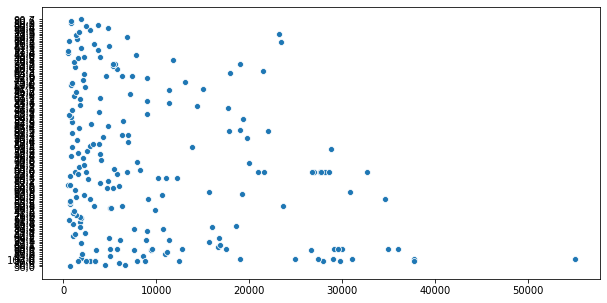

In [5]:
# Change this scatter plot to have percent literate on the y-axis
sns.scatterplot(x=gdp, y=percent_literate);

### Making a count plot with a list
In the last exercise, we explored a dataset that contains information about 227 countries. Let's do more exploration of this data - specifically, how many countries are in each region of the world?

To do this, we'll need to use a count plot. Count plots take in a categorical list and return bars that represent the number of list entries per category. You can create one here using a list of regions for each country, which is a variable named `region`.

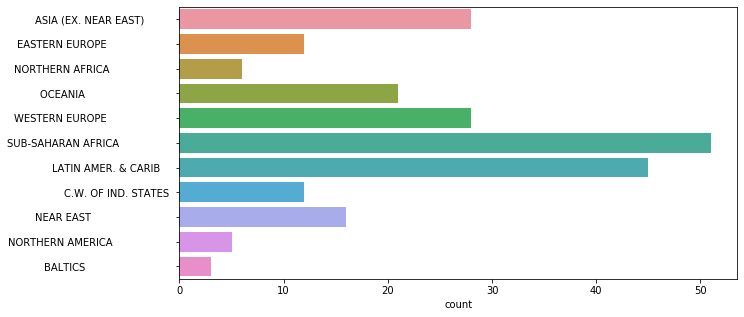

In [7]:
# Create count plot with region on the y-axis
sns.countplot(y=region);

Sub-Saharan Africa contains the most countries in this list. We'll revisit count plots later in the course.

## Using pandas with Seaborn
- What is pandas?
    - Python library for data analysis
    - Easily read datasets from csv, txt, and other types of files
    - Datasets take the form of DataFrame objects

### "Tidy" vs. "untidy" data
Here, we have a sample dataset from a survey of children about their favorite animals. But can we use this dataset as-is with Seaborn? Let's use Pandas to import the csv file with the data collected from the survey and determine whether it is tidy, which is essential to having it work well with Seaborn.

### Making a count plot with a DataFrame
In this exercise, we'll look at the responses to a survey sent out to young people. Our primary question here is: how many young people surveyed report being scared of spiders? Survey participants were asked to agree or disagree with the statement "I am afraid of spiders". Responses vary from 1 to 5, where 1 is "Strongly disagree" and 5 is "Strongly agree".

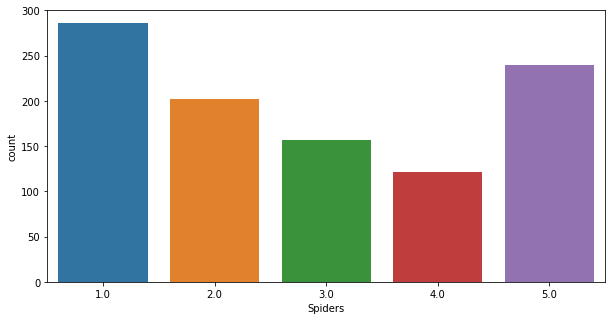

In [8]:
df = pd.read_csv('./dataset/young-people-survey-responses.csv')

# Create a count plot with "Spiders" on the x-axis
sns.countplot('Spiders', data=df);

## Adding a third variable with hue


### Hue and scatter plots
In the prior video, we learned how `hue` allows us to easily make subgroups within Seaborn plots. Let's try it out by exploring data from students in secondary school. We have a lot of information about each student like their age, where they live, their study habits and their extracurricular activities.

For now, we'll look at the relationship between the number of absences they have in school and their final grade in the course, segmented by where the student lives (rural vs. urban area).

In [9]:
student_data = pd.read_csv('./dataset/student-alcohol-consumption.csv', index_col=0)
student_data.head()

school sex  age famsize Pstatus  Medu  Fedu  traveltime  failures schoolsup  \
0     GP   F   18     GT3       A     4     4           2         0       yes   
1     GP   F   17     GT3       T     1     1           1         0        no   
2     GP   F   15     LE3       T     1     1           1         3       yes   
3     GP   F   15     GT3       T     4     2           1         0        no   
4     GP   F   16     GT3       T     3     3           1         0        no   

   ... goout Dalc Walc health absences  G1  G2  G3  location     study_time  
0  ...     4    1    1      3        6   5   6   6     Urban   2 to 5 hours  
1  ...     3    1    1      3        4   5   5   6     Urban   2 to 5 hours  
2  ...     2    2    3      3       10   7   8  10     Urban   2 to 5 hours  
3  ...     2    1    1      5        2  15  14  15     Urban  5 to 10 hours  
4  ...     2    1    2      5        4   6  10  10     Urban   2 to 5 hours  

[5 rows x 29 columns]

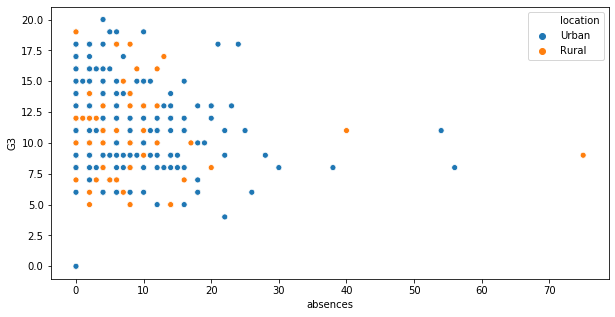

In [10]:
# Create a scatter plot of absences vs. final grade
sns.scatterplot(x="absences", y="G3", data=student_data, hue='location');

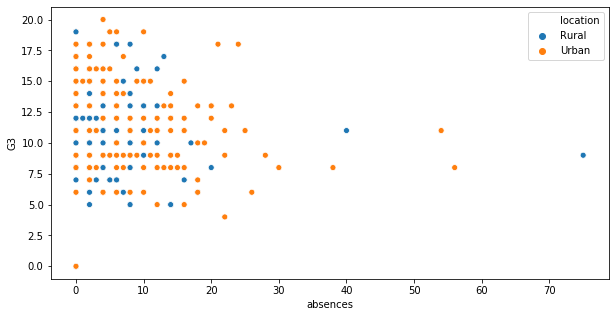

In [11]:
# Change the legend order in the scatter plot
sns.scatterplot(x="absences", y="G3", 
                data=student_data,
                hue='location',
                hue_order=['Rural', 'Urban']);

### Hue and count plots
Let's continue exploring our dataset from students in secondary school by looking at a new variable. The `"school"` column indicates the initials of which school the student attended - either "GP" or "MS".

In the last exercise, we created a scatter plot where the plot points were colored based on whether the student lived in an urban or rural area. How many students live in urban vs. rural areas, and does this vary based on what school the student attends? Let's make a count plot with subgroups to find out.

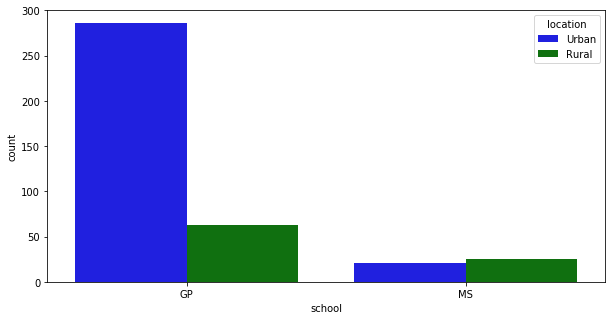

In [12]:
# Create a dictionary mapping subgroup values to colors
palette_colors = {'Rural': "green", 'Urban': "blue"}

# Create a count plot of school with location subgroups
sns.countplot('school', data=student_data, hue='location' ,palette=palette_colors);

Students at GP tend to come from an urban location, but students at MS are more evenly split.